In [37]:
!nvidia-smi


Mon Dec 15 16:11:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             29W /   70W |    1238MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.3 MB/s eta 0:00:00


In [16]:
from google.colab import drive


In [17]:
!apt-get install -y unrar
!unrar x data.rar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from data.rar

Creating    data                                                      OK
Extracting  data/data.yaml                                                 0%  OK 
Creating    data/images                                               OK
Creating    data/images/train                                         OK
Extracting  data/images/train/Cars0.png                                    0%  OK 
Extracting  data/images/train/Cars1.png                                    0%  OK 
Extracting  data/images/train/Cars10.png                                   0%  OK 
Extracting  data/images/train/Cars100.png                                  0%  OK 


In [18]:
!ls data/images/train | head
!ls data/labels/train | head


Cars0.png
Cars100.png
Cars101.png
Cars102.png
Cars103.png
Cars104.png
Cars105.png
Cars106.png
Cars107.png
Cars108.png
Cars0.txt
Cars100.txt
Cars101.txt
Cars102.txt
Cars103.txt
Cars104.txt
Cars105.txt
Cars106.txt
Cars107.txt
Cars108.txt


In [36]:
!ls

data.yaml  DSC_1104.JPG  images  labels  runs  yolo11n.pt  yolov8n.pt


In [14]:
from google.colab import files
uploaded = files.upload()

Saving data.rar to data.rar


In [24]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [25]:
!ls /content/data/images/train | head
!ls /content/data/images/val | head
!ls /content/data/labels/train | head


Cars0.png
Cars100.png
Cars101.png
Cars102.png
Cars103.png
Cars104.png
Cars105.png
Cars106.png
Cars107.png
Cars108.png
Cars182.png
Cars183.png
Cars184.png
Cars185.png
Cars186.png
Cars187.png
Cars188.png
Cars189.png
Cars190.png
Cars191.png
Cars0.txt
Cars100.txt
Cars101.txt
Cars102.txt
Cars103.txt
Cars104.txt
Cars105.txt
Cars106.txt
Cars107.txt
Cars108.txt


In [26]:
%%writefile /content/data/data.yaml
path: /content/data
train: images/train
val: images/val

nc: 1
names: ["license_plate"]


Overwriting /content/data/data.yaml


In [28]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/data/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb64dae7ef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [29]:
model.val()


Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3338.7±1573.4 MB/s, size: 552.1 KB)
val: Scanning /content/data/labels/val.cache... 87 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 87/87 106.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.0it/s 3.0s
                   all         87         92      0.886       0.87      0.906      0.511
Speed: 4.3ms preprocess, 13.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /content/data/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb64c1b84a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [30]:
model.predict(
    source="/content/data/images/val",
    conf=0.25,
    save=True
)



image 1/87 /content/data/images/val/Cars182.png: 384x640 1 license_plate, 41.3ms
image 2/87 /content/data/images/val/Cars183.png: 384x640 1 license_plate, 6.1ms
image 3/87 /content/data/images/val/Cars184.png: 384x640 1 license_plate, 5.7ms
image 4/87 /content/data/images/val/Cars185.png: 448x640 2 license_plates, 38.7ms
image 5/87 /content/data/images/val/Cars186.png: 384x640 1 license_plate, 6.6ms
image 6/87 /content/data/images/val/Cars187.png: 384x640 1 license_plate, 5.8ms
image 7/87 /content/data/images/val/Cars188.png: 640x480 (no detections), 39.7ms
image 8/87 /content/data/images/val/Cars189.png: 448x640 1 license_plate, 6.6ms
image 9/87 /content/data/images/val/Cars190.png: 480x640 1 license_plate, 37.3ms
image 10/87 /content/data/images/val/Cars191.png: 416x640 1 license_plate, 40.6ms
image 11/87 /content/data/images/val/Cars192.png: 480x640 1 license_plate, 6.5ms
image 12/87 /content/data/images/val/Cars193.png: 448x640 1 license_plate, 6.4ms
image 13/87 /content/data/imag

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[ 75,  89,  95],
         [ 82,  98, 103],
         [ 98, 116, 120],
         ...,
         [252, 253, 253],
         [252, 254, 254],
         [252, 254, 254]],
 
        [[ 64,  78,  81],
         [ 67,  81,  84],
         [ 70,  85,  88],
         ...,
         [252, 253, 253],
         [252, 253, 253],
         [252, 253, 253]],
 
        [[ 56,  65,  66],
         [ 59,  69,  69],
         [ 61,  72,  73],
         ...,
         [252, 253, 253],
         [252, 253, 253],
         [252, 253, 253]],
 
        ...,
 
        [[ 53,  38,  24],
         [ 40,  24,  10],
         [ 44,  27,  14],
         ...,
         [132, 136, 135],
         [132, 137, 136],
         [112, 117, 115]],
 
        [[ 46,  30,  17],
         [ 38,  22,   8],
         [ 38,  22,   8],
         ...,
         [1

(np.float64(-0.5), np.float64(589.5), np.float64(349.5), np.float64(-0.5))

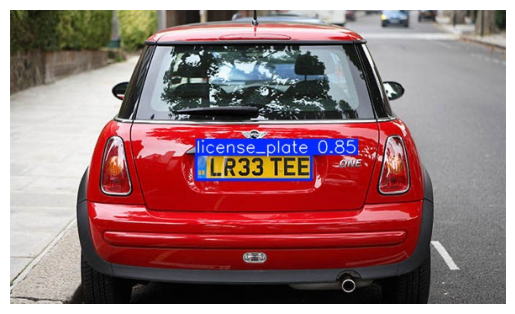

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/data/runs/detect/predict/Cars201.jpg")
plt.imshow(img)
plt.axis("off")


In [49]:
from google.colab import files
uploaded = files.upload()

Saving DSC_0975.JPG to DSC_0975.JPG


In [53]:
model.predict(
    source="/content/data/DSC_0975.JPG",
    conf=0.3,
    save=True
)



image 1/1 /content/data/DSC_0975.JPG: 640x480 1 license_plate, 16.6ms
Speed: 6.2ms preprocess, 16.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/data/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[219, 217, 217],
         [218, 216, 216],
         [218, 216, 216],
         ...,
         [221, 219, 218],
         [221, 219, 218],
         [220, 218, 217]],
 
        [[219, 217, 217],
         [218, 216, 216],
         [217, 215, 215],
         ...,
         [220, 218, 217],
         [220, 218, 217],
         [220, 218, 217]],
 
        [[219, 217, 217],
         [218, 216, 216],
         [217, 215, 215],
         ...,
         [220, 218, 217],
         [220, 218, 217],
         [220, 218, 217]],
 
        ...,
 
        [[ 42,  45,  50],
         [ 41,  44,  49],
         [ 38,  41,  46],
         ...,
         [ 70,  68,  68],
         [ 69,  67,  67],
         [ 72,  70,  70]],
 
        [[ 39,  42,  47],
         [ 39,  42,  47],
         [ 39,  42,  47],
         ...,
         [ 

(np.float64(-0.5), np.float64(1504.5), np.float64(2024.5), np.float64(-0.5))

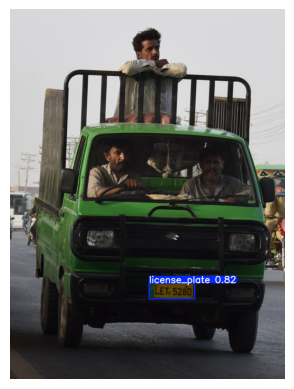

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/data/runs/detect/predict2/DSC_0975.jpg")
plt.imshow(img)
plt.axis("off")


In [55]:
!pip install easyocr opencv-python-headless


In [56]:
from ultralytics import YOLO

model = YOLO("/content/data/runs/detect/train/weights/best.pt")


In [57]:
results = model.predict(
    source="/content/data/runs/detect/predict2/DSC_0975.jpg",
    conf=0.3,
    save=False
)



image 1/1 /content/data/runs/detect/predict2/DSC_0975.jpg: 640x480 4 license_plates, 46.9ms
Speed: 15.1ms preprocess, 46.9ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 480)


In [59]:
import cv2
import numpy as np

# Load image
img = cv2.imread("/content/data/runs/detect/predict2/DSC_0975.jpg")

# YOLO result (single image)
r = results[0]

# Get boxes
boxes = r.boxes.xyxy.cpu().numpy()

plate_crops = []

for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    crop = img[y1:y2, x1:x2]
    plate_crops.append(crop)


In [60]:
import easyocr

reader = easyocr.Reader(['en'], gpu=True)  # GPU works in Colab

for i, plate in enumerate(plate_crops):
    results_ocr = reader.readtext(plate)

    print(f"\nPlate {i+1}:")
    for bbox, text, confidence in results_ocr:
        print(f"Detected Text: {text} | Confidence: {confidence:.2f}")



Plate 1:
Detected Text: license_plate | Confidence: 0.76
Detected Text: LETs 5280| | Confidence: 0.74

Plate 2:
Detected Text: license_plate | Confidence: 0.76
Detected Text: 0.82 | Confidence: 1.00
Detected Text: LETs 5280| | Confidence: 0.69

Plate 3:
Detected Text: LETs 5280| | Confidence: 0.67

Plate 4:
Detected Text: Iicense_pi | Confidence: 0.76
Detected Text: LETs 5280] | Confidence: 0.63


(np.float64(-0.5), np.float64(347.5), np.float64(137.5), np.float64(-0.5))

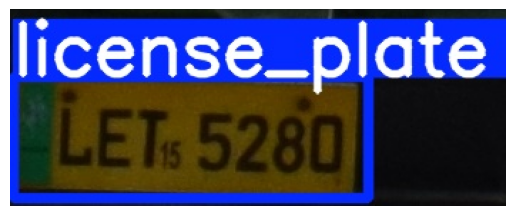

In [61]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(plate_crops[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
